In [1]:
# Import libraries
import os
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import box
from shapely.geometry.point import Point
import geopandas as gpd
import earthpy as et
from glob import glob
import cartopy.crs as ccrs
import cartopy
from matplotlib.colors import ListedColormap

In [2]:
# Get the data & set working dir
data_path = "/scratch/usr/hbkoziel/Arc12/WWF_bioregions"
working_path = "earth-analytics-python-env"

if os.path.exists(data_path) == True:
    os.path.join(data_path)
    print('data path added succesfully')
else:
    print('wrong path to data please correct')
    
if os.path.exists(os.path.join(et.io.HOME, working_path)) == True:
    os.chdir(os.path.join(et.io.HOME, working_path))
    print('working directory added succesfully')
else:
    print('wrong path to working directory please correct')

data path added succesfully
working directory added succesfully


In [3]:
# Get a specific directory
glob(os.path.join(data_path, '*'))

['/scratch/usr/hbkoziel/Arc12/WWF_bioregions/RACER_Study_Units_160210_Mar.shp',
 '/scratch/usr/hbkoziel/Arc12/WWF_bioregions/RACER_Study_Units_160210_Mar.sbx',
 '/scratch/usr/hbkoziel/Arc12/WWF_bioregions/RACER_Study_Units_160210_Mar.prj',
 '/scratch/usr/hbkoziel/Arc12/WWF_bioregions/RACER_Study_Units_160210_Mar.dbf',
 '/scratch/usr/hbkoziel/Arc12/WWF_bioregions/RACER_Study_Units_160210_Mar.shp.xml',
 '/scratch/usr/hbkoziel/Arc12/WWF_bioregions/RACER_Study_Units_160210_Mar.shx',
 '/scratch/usr/hbkoziel/Arc12/WWF_bioregions/wwf_bioregions_shapefile.zip',
 '/scratch/usr/hbkoziel/Arc12/WWF_bioregions/RASTER.jpg',
 '/scratch/usr/hbkoziel/Arc12/WWF_bioregions/__MACOSX',
 '/scratch/usr/hbkoziel/Arc12/WWF_bioregions/RACER_Study_Units_160210_Mar.sbn']

In [4]:
shapefile = glob(os.path.join(data_path, '*.shp'))

In [5]:
# Import shapefile using geopandas
wwf = gpd.read_file('/scratch/usr/hbkoziel/Arc12/WWF_bioregions/RACER_Study_Units_160210_Mar.shp')

In [6]:
# Import world boundary shapefile
# Get data and set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics-python-env'))
data = et.data.get_data('spatial-vector-lidar')

# worldBound_path = os.path.join("data", "spatial-vector-lidar", "global", 
#                                "ne_110m_land", "ne_110m_land.shp")
# worldBound = gpd.read_file(worldBound_path)
# worldBound.crs

In [7]:
#wwf.crs.coordinate_system
wwf.crs.coordinate_system
# Reproject the data / get projections
crs_latlon = ccrs.PlateCarree()
crs = ccrs.NorthPolarStereo()


#crs_proj4 = crs.proj4_init
#worldBound_Nstereo = worldBound.to_crs(crs_proj4)
#wwf_Nstereo = wwf.to_crs(crs_proj4)
#worldBound_Nstereo = worldBound.to_crs(epsg=9001)
#worldBound_Nstereo = worldBound.to_crs(epsg=9001)
wwf_Nstereo = wwf.to_crs(epsg=9001)

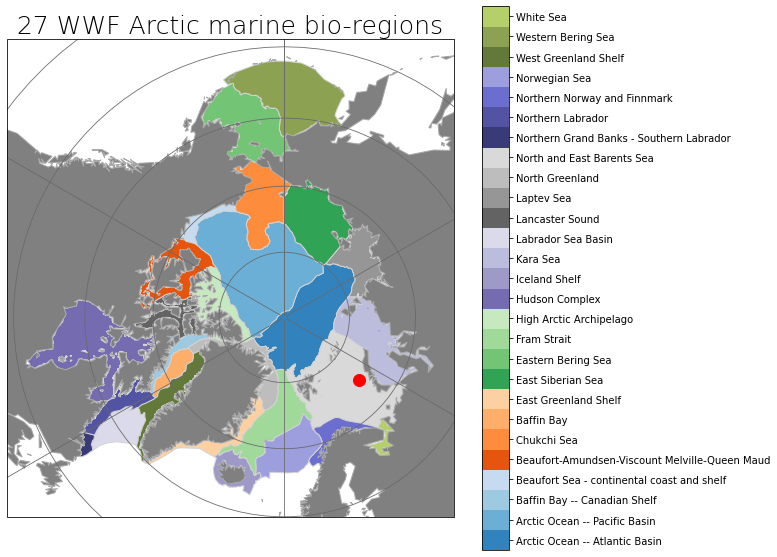

In [8]:
fig, ax = plt.subplots(figsize=(10, 10),subplot_kw=dict(projection=crs))

# set colormap #
cmap1=cm.get_cmap('tab20c')
cmap2=cm.get_cmap('tab20b')

ncolors = np.vstack([np.array(cmap1.colors),np.array(cmap2.colors)])
ncolors = ncolors[:27,:]
cmap = ListedColormap(ncolors)

norm = cm.colors.Normalize(vmin=0, vmax=27)
sm = plt.cm.ScalarMappable(cmap=cmap,norm=norm)


wwf.plot(categorical=True, legend=True,ax=ax, cmap=cmap, edgecolor='lightgray')

# OPTION 1: low definition lands #
#ax.add_feature(cartopy.feature.LAND, zorder=1,facecolor='lightgray', edgecolor='gray')
#ax.coastlines(resolution='50m',color,'darkgray')

# OPTION 2: high definition lands #
lands = cartopy.feature.GSHHSFeature(scale='auto', levels=[2])
ax.add_feature(lands, edgecolor='darkgray', facecolor='gray', zorder=1)

# add gridlines
ax.gridlines(crs=crs_latlon, linestyle='-',color='dimgray')

# plot one random point in the Barents Sea
ax.plot(50,75,'ro',markersize=12, transform=crs_latlon)

# Add a title
ax.set_title('27 WWF Arctic marine bio-regions', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend
cbar = fig.colorbar(sm, spacing = 'uniform', orientation = 'vertical',ticks=np.arange(0.5,27.5,1))
cbar.ax.set_yticklabels(wwf.Name)


plt.savefig('wwf_arctic27bioregions.png', dpi=300)

In [24]:
wwf_Nstereo.crs.coordinate_system

CS[Cartesian,3],
    AXIS["(X)",geocentricX,
        ORDER[1],
        LENGTHUNIT["metre",1,
            ID["EPSG",9001]]],
    AXIS["(Y)",geocentricY,
        ORDER[2],
        LENGTHUNIT["metre",1,
            ID["EPSG",9001]]],
    AXIS["(Z)",geocentricZ,
        ORDER[3],
        LENGTHUNIT["metre",1,
            ID["EPSG",9001]]]

In [10]:
# Setting the coordinates for the point
#CUSP = shapely.geometry.Point((50, 75,)) # Longitude & Latitude

# Printing a list of the coords to ensure iterable 
#list(CUSP.coords)

# Searching for the geometry that intersects the point. Returning the index for the appropriate polygon. 
#index = wwf_Nstereo[wwf_Nstereo.geometry.intersects(CUSP)].

#BCTCB2010.values[0]

In [47]:
#making a GeoDataFrame with your city
pts = Point(50, 75)
list(pts.coords)


/home/hbkoziel/.conda/envs/earth-analytics-python/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [49]:
wd_path = os.path.join(my_home,"pyfesom")
meshpath    = wd_path+'/data/mesh/meshArc4.5/'
mesh = pf.load_mesh(meshpath, usepickle=True,get3d=FALSO)
# /home/hbkoziel/pyfesom/data/mesh/meshArc4.5/Arc4.5.initial.mesh.diag.nc

Arc4.5.initial.mesh.diag.nc*  Grid.png*        Init.1979.tr14*
aux3d.out*                    Init.1979.tr01*  Init.1979.tr15*
Cbpm8daySummer_meshArc45.nc*  Init.1979.tr02*  Init.1979.tr16*
depth.out*                    Init.1979.tr03*  Init.1979.tr17*
dist/                         Init.1979.tr04*  Init.1979.tr18*
dist_100nodes/                Init.1979.tr05*  Init.1979.tr19*
dist_135nodes/                Init.1979.tr06*  Init.1979.tr20*
dist_32nodes/                 Init.1979.tr07*  Init.1979.tr21*
dist_40nodes/                 Init.1979.tr08*  meshArc4.5.initial.1979.ice.nc*
dist_64nodes/                 Init.1979.tr09*  meshArc4.5.initial.1979.oce.nc*
elem2d.out*                   Init.1979.tr10*  nod2d.out*
elem3d.out*                   Init.1979.tr11*  nod3d.out*
elem_py.txt*                  Init.1979.tr12*  pickle_mesh*
forcing_data_on_grid/         Init.1979.tr13*  Sven/


In [44]:
Data_points_Npolar.crs.coordinate_system

CS[Cartesian,3],
    AXIS["(X)",geocentricX,
        ORDER[1],
        LENGTHUNIT["metre",1,
            ID["EPSG",9001]]],
    AXIS["(Y)",geocentricY,
        ORDER[2],
        LENGTHUNIT["metre",1,
            ID["EPSG",9001]]],
    AXIS["(Z)",geocentricZ,
        ORDER[3],
        LENGTHUNIT["metre",1,
            ID["EPSG",9001]]]

In [41]:
Data_points = gpd.GeoDataFrame([{"data_point" : "1", "geometry":pts} ], crs={'init': 'epsg:4326'})
#Data_points_latlon = Data_points.to_crs(epsg = 32662)
merging = gpd.sjoin(Data_points.to_crs(epsg = 9001), wwf_Nstereo.to_crs(epsg = 9001), how="left", op="within")

In [1]:
merging

NameError: name 'merging' is not defined